In [1]:
import sys
import os


# path = "C:/Users/meide/Documents/GitHub/Master/data"
path = "data/"
os.chdir(path)

In [6]:
gem = "core"
x_coord = "mass_rank"
y_coord = "MolLogP_rank"

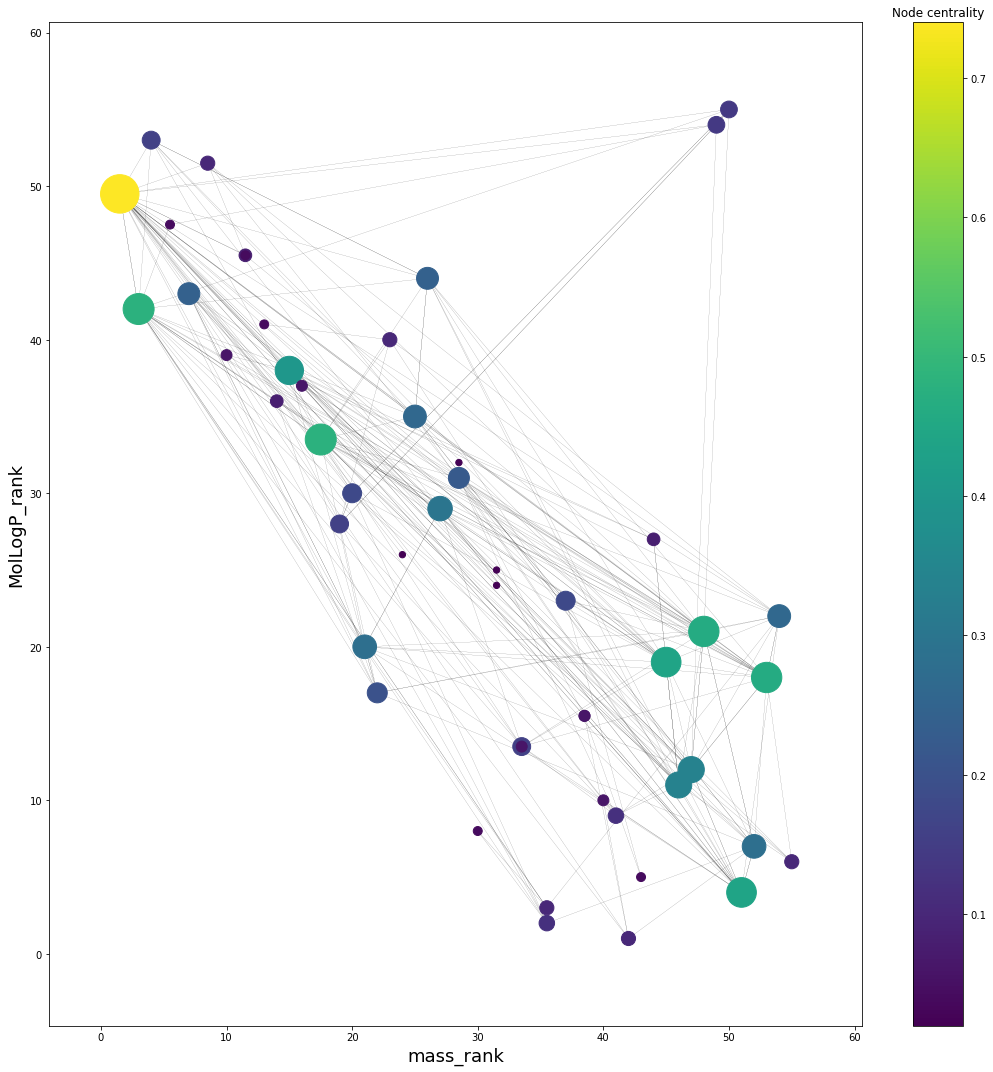

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_com
import numpy as np
import scipy.sparse
import matplotlib.colors as mcolors
import matplotlib.cm as cm





DescriptorPair = "{}_{}".format(x_coord, y_coord)
file_name = "{gem} + {DescriptorPair}".format(gem = gem, DescriptorPair = DescriptorPair)
fig, ax = plt.subplots(figsize=(15,15))


DriedPeach = pd.read_csv(f"{gem}_edges.csv")



#Genome-scale metabolic network

sources = DriedPeach["BiGG"]
targets = DriedPeach["target"]
coordinates = DriedPeach[[x_coord, y_coord]].values


edge_data = zip(sources,targets, coordinates)

H = nx.DiGraph()

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    H.add_node(src, pos = c)
    H.add_edge(src,dst)

H.remove_edges_from(nx.selfloop_edges(H))

pos_BC_gem = nx.get_node_attributes(H,'pos')

deg_centrality = nx.degree_centrality(H)
cent = np.fromiter(deg_centrality.values(), float)

centrality = np.fromiter(deg_centrality.values(), float)

degree = nx.degree(H)

degree_values = [v for k , v in degree]

degree_values = np.fromiter(degree_values, float)
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)
plt.tight_layout()
cb = plt.colorbar(scalarmappaple)
cb.ax.set_title("Node centrality")



# Draw GEM network
nx.draw_networkx_nodes(H, pos_BC_gem, node_color=centrality, node_size=centrality*2e3)
nx.draw_networkx_edges(H, pos_BC_gem, width = 0.1, arrows = False) #width 0.1 for 1515 and 0.3 for core


limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.tight_layout()

# plt.savefig(f"Plots/{gem}_new/{file_name}.png", format="PNG")
plt.show()

In [8]:
cyto = nx.cytoscape_data(H)

In [9]:
cyto

{'data': [],
 'directed': True,
 'multigraph': False,
 'elements': {'nodes': [{'data': {'pos': array([46., 11.]),
     'id': 'M_atp_c',
     'value': 'M_atp_c',
     'name': 'M_atp_c'}},
   {'data': {'pos': array([45., 19.]),
     'id': 'M_adp_c',
     'value': 'M_adp_c',
     'name': 'M_adp_c'}},
   {'data': {'pos': array([ 1.5, 49.5]),
     'id': 'M_h_c',
     'value': 'M_h_c',
     'name': 'M_h_c'}},
   {'data': {'pos': array([41.,  9.]),
     'id': 'M_13dpg_c',
     'value': 'M_13dpg_c',
     'name': 'M_13dpg_c'}},
   {'data': {'pos': array([23., 40.]),
     'id': 'M_actp_c',
     'value': 'M_actp_c',
     'name': 'M_actp_c'}},
   {'data': {'pos': array([17.5, 33.5]),
     'id': 'M_pi_c',
     'value': 'M_pi_c',
     'name': 'M_pi_c'}},
   {'data': {'pos': array([ 7., 43.]),
     'id': 'M_co2_c',
     'value': 'M_co2_c',
     'name': 'M_co2_c'}},
   {'data': {'pos': array([27., 29.]),
     'id': 'M_pep_c',
     'value': 'M_pep_c',
     'name': 'M_pep_c'}},
   {'data': {'pos': array

In [89]:
import json

Cytoscape_data = nx.cytoscape_data(H)

# cytoscape_dict = print(Cytoscape_data)
# print(Cytoscape)json_object = json.dumps(Cytoscape_data, indent = 4) 
# print(json_object)

# json_object
with open("randomfile.txt", "a") as o:
    o.write(Cytoscape_data)
    o.write('This text will be added to the file')
# Cytoscape_data

TypeError: write() argument must be str, not dict

In [78]:
import json

with open ("1515_cyjs.json", "w") as f:
    json.dump(cytoscape_dict, f)